## Chargement Des Données

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import ClusterCentroids

In [40]:
dt=pd.read_excel("Telco_customer_churn.csv.xlsx")

In [41]:
dt.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [27]:
print (f"La dimension de notre 'dataSet' est {dt.shape}")

La dimension de notre 'dataSet' est (7043, 33)


## I-Compréhension des données: 
- Visualisation des données
- Statistiques descriptives


In [28]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**Observation:**  
* Au total, il y a 33 colonnes de données, y compris les types de données int64, float64 et object.   
* presque toutes les données  qui doivent être numériques sont de type flottant ou entier. Une exception se trouve dans la       colonne "TotalCharges"  
* pour la colonne churn reason on a seulement 1869 valeurs non nulles parmis 7043



In [29]:
# Vérifier les plages de valeurs des données
for col in dt:
    print(f'Colonne: {col}')
    print(f'Valueurs: {dt[col].unique()[:5]}')
    print('---')

Colonne: CustomerID
Valueurs: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' '7892-POOKP' '0280-XJGEX']
---
Colonne: Count
Valueurs: [1]
---
Colonne: Country
Valueurs: ['United States']
---
Colonne: State
Valueurs: ['California']
---
Colonne: City
Valueurs: ['Los Angeles' 'Beverly Hills' 'Huntington Park' 'Lynwood'
 'Marina Del Rey']
---
Colonne: Zip Code
Valueurs: [90003 90005 90006 90010 90015]
---
Colonne: Lat Long
Valueurs: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 '34.062125, -118.315709' '34.039224, -118.266293']
---
Colonne: Latitude
Valueurs: [33.964131 34.059281 34.048013 34.062125 34.039224]
---
Colonne: Longitude
Valueurs: [-118.272783 -118.30742  -118.293953 -118.315709 -118.266293]
---
Colonne: Gender
Valueurs: ['Male' 'Female']
---
Colonne: Senior Citizen
Valueurs: ['No' 'Yes']
---
Colonne: Partner
Valueurs: ['No' 'Yes']
---
Colonne: Dependents
Valueurs: ['No' 'Yes']
---
Colonne: Tenure Months
Valueurs: [ 2  8 28 49 10]
---
Colonne: Phone Servic

**Observation et ramarques :**  
* La colonne customer ID est à Eleminer 
* chacune les colonnes 'Country','Count'et'State' a une seule valeur inchangé pour tout les individus
* 'City','Zip Code','Lat Long','Latitude' et'Longitude' comportent seulement des données géographiques 
* La Colonne 'Churn Label' n'apporte aucune information supplimentaire à la colonne churn value


### Visualisation des Variables discrétes
* saisir le sous-ensemble catégoriel des données
* tirer des remarques 

In [30]:
dt_discrete = dt[dt.select_dtypes(['object']).columns]
dt_discrete = dt_discrete.drop(columns=['CustomerID', 'Total Charges','City','Lat Long'])
cols = dt_discrete.columns

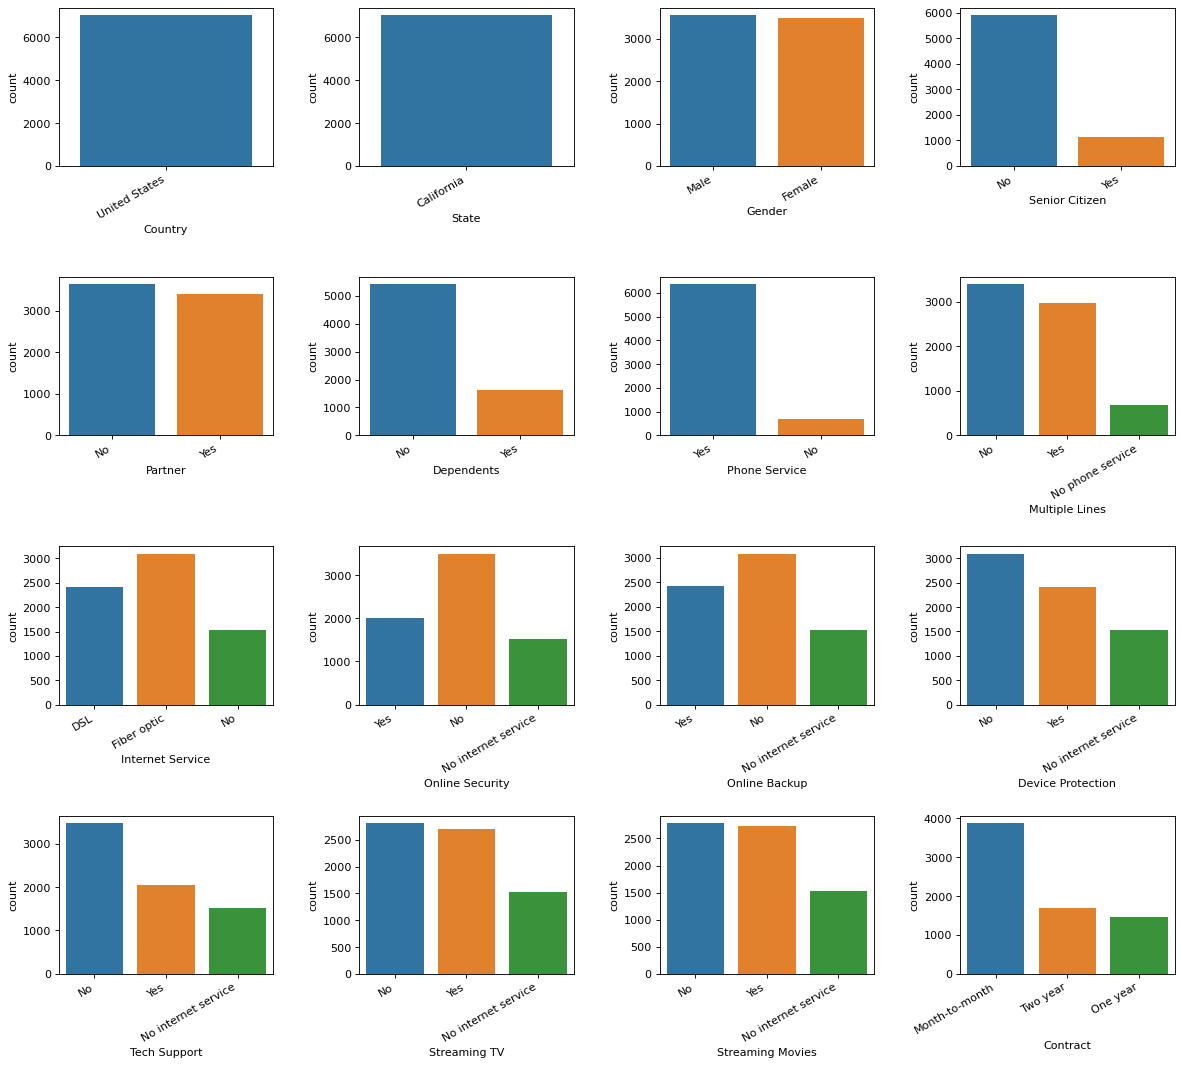

In [31]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.7, wspace=.4)

index = 0
for row in range(4):
    for col in range(4):
        ax = fig.add_subplot(4, 4, index+1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
        col = cols[index]
        ax = sns.countplot(x=col, data=dt_discrete)
        index+=1

#### Observation:
Certaines fonctionnalités sont considérablement déséquilibrées, par exemple 'Dependents', 'PhoneService', 'MultipleLines', 'Contract' et 'Churn'.
Surtout Churn semble être critique, puisque c'est le label qui est censé être prédit.

In [32]:
#des statistique descriptives pour les variables numeriques
dt.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [33]:
dt[['Total Charges','Tenure Months','Monthly Charges']]
#On remarque que Tenure_months * Monthly_Charges = Total Chrages

,Total Charges,Tenure Months,Monthly Charges
0,108.15,2,53.85
1,151.65,2,70.70
2,820.5,8,99.65
3,3046.05,28,104.80
4,5036.3,49,103.70
...,...,...,...
7038,1419.4,72,21.15
7039,1990.5,24,84.80
7040,7362.9,72,103.20
7041,346.45,11,29.60


### Contribution des variables Numeriques  à 'Churn Value'

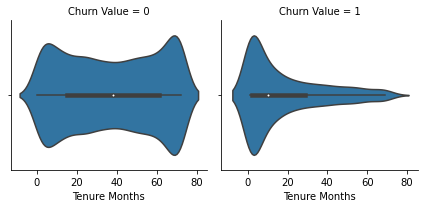

In [34]:
sns.FacetGrid(dt, col='Churn Value').map(sns.violinplot, 'Tenure Months', order=[0,1])

#### Observation:
* Les clients à faible 'Tenure Months' sont beaucoup plus susceptibles de se désister.
* Dans le même temps, les clients qui n'ont pas churn sont répartis sur un large éventail de 'Tenure Months'.

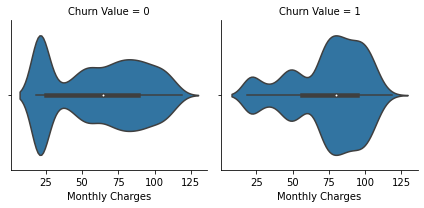

In [35]:
sns.FacetGrid(dt, col='Churn Value').map(sns.violinplot, 'Monthly Charges', order=[0,1])

#### Observation:
* Le graphe indique que les 'Monthly Charges' ont un impact significatif sur la décision des clients de 'Churn'.
* Les clients avec des 'Monthly Charges' élevés sont beaucoup plus susceptibles de 'churn' que les clients avec un faible     montant de 'Monthly Charges'. En revanche, les clients dont les 'Monthly Charges' sont bas sont plus susceptibles de 'no Churn'.

TypeError: '<' not supported between instances of 'str' and 'float'

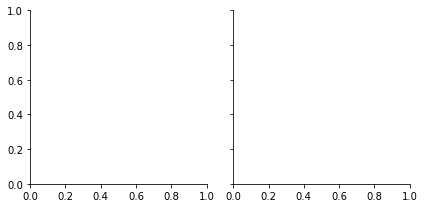

In [36]:
#Il faut tout d'abord Convertir 'Total Charges' 
sns.FacetGrid(dt, col='Churn Value').map(sns.violinplot, 'Total Charges', order=[0,1])

#### Observation:
'Total Charges' n'a pas d'impact significatif sur le taux de 'Churn'. Les distributions ne montrent pas de grande différence.

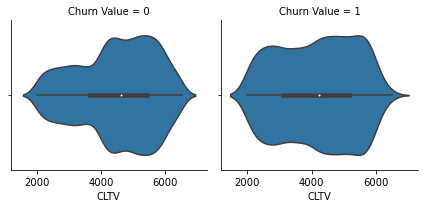

In [37]:
sns.FacetGrid(dt, col='Churn Value').map(sns.violinplot, 'CLTV', order=[0,1])

#### Observation:
'CLTV' n'a pas d'impact significatif sur le taux de 'Churn'. Les distributions ne montrent pas de grande différence.

### Contribution des variables Categorielles  à 'Churn Value'

In [19]:
#Selection des variables 
categorical = ['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
'Churn Value']
categorical_dt = dt[categorical]

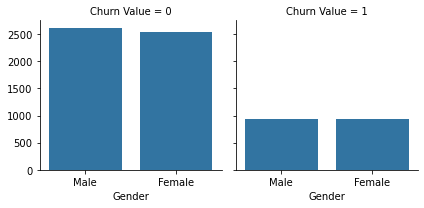

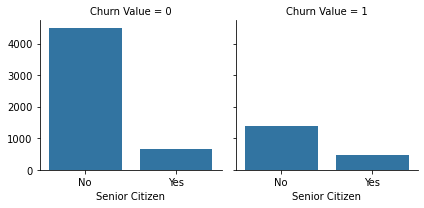

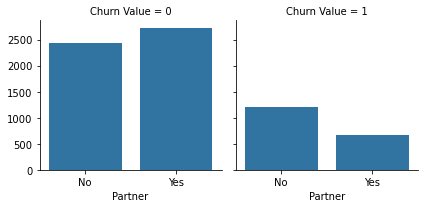

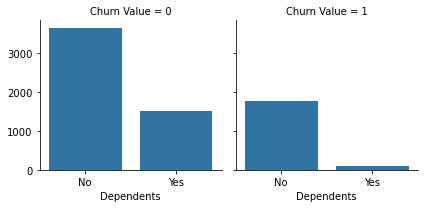

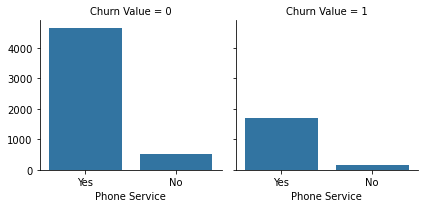

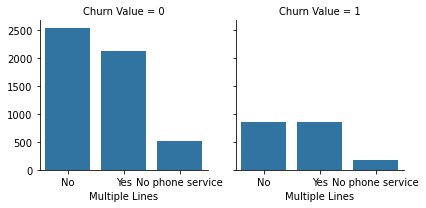

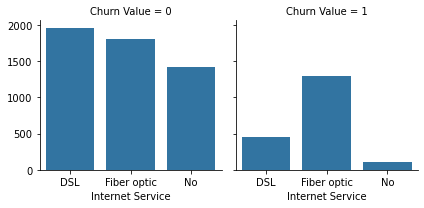

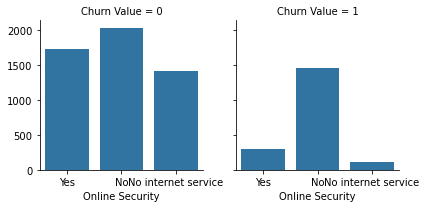

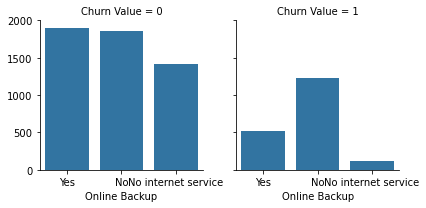

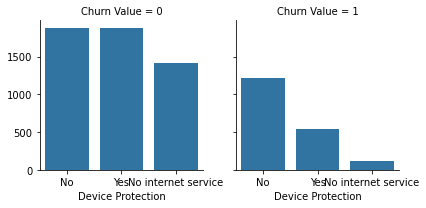

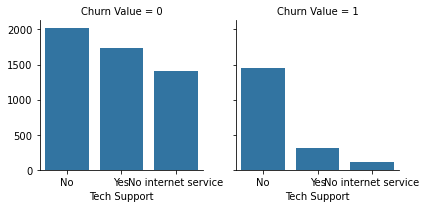

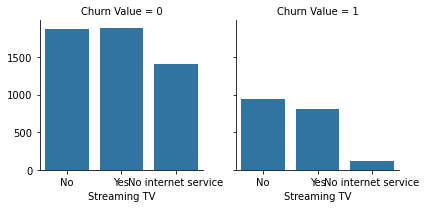

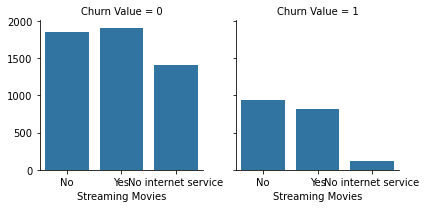

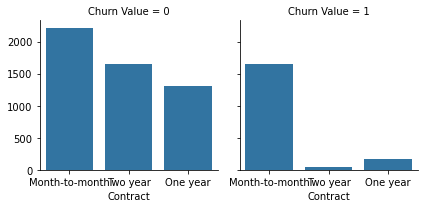

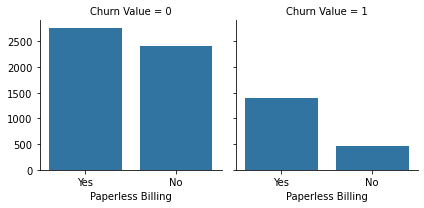

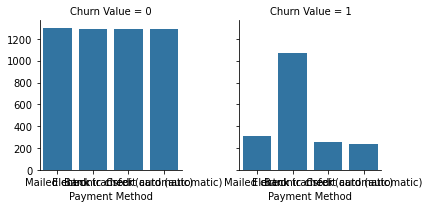

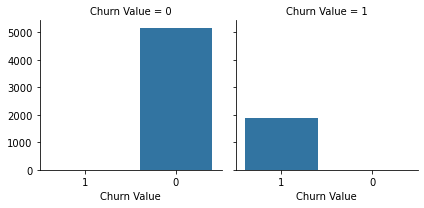

In [20]:
categorial = categorical_dt.columns

index = 0
for index in range(len(categorial)):
    col = categorial[index]
    sns.FacetGrid(categorical_dt, col='Churn Value').map(
        sns.countplot, col, order=categorical_dt[col].unique())

#### Observations 
* 'Gender' ne semble pas être une caractéristique précieuse pour la prévision du taux de désabonnement. Les valeurs sont uniformément réparties
* Les 'senior Citizen' sont presque susceptibles de 'No Churn'. Les jeunes clients sont plus susceptibles de 'Chuen'. Cette hypothèse pourrait être biaisée en raison d'un nombre plus faible de personnes 'Senior citizen' dans l'ensemble de données.
* Les clients sans partenaire sont un peu plus susceptibles de chuter.
* Les clients ayant des personnes à charge sont un peu moins susceptibles de se désabonner.
* Le service téléphonique semble avoir peu d'impact sur la décision du client de meme pour 'Multiple lines'.
* 'Internet Service' a un impact sur le taux de désabonnement. Les clients de la fibre optique sont plus susceptibles de chuter.
* 'Online Security' semble être une caractéristique importante. Les clients sans sécurité en ligne sont plus susceptibles de chuter.
* Le manque de services de sauvegarde en ligne ('Online Backup') augmente la probabilité de désabonnement.
* Le manque de protection de l'appareil ('Device Protection') augmente la probabilité de désabonnement
* Le manque de support technique ('Tec Support') augmente la probabilité de désabonnement.


## II-Preparation des données
- Suppression des variables non significatives 
- Valeurs Manquantes
- Conversions des variables de type 'Objet'
- Encodage des variables explicatives


In [16]:
cols=['Country','Count','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Label','Churn Score','CLTV','Churn Reason']
for i in cols:
    dt=dt.drop(i,axis='columns')

In [17]:
for col in dt:
    print(f'Colonne: {col}')
    print(f'Valueurs: {dt[col].unique()[:5]}')
    print('---')

Colonne: CustomerID
Valueurs: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' '7892-POOKP' '0280-XJGEX']
---
Colonne: Gender
Valueurs: ['Male' 'Female']
---
Colonne: Senior Citizen
Valueurs: ['No' 'Yes']
---
Colonne: Partner
Valueurs: ['No' 'Yes']
---
Colonne: Dependents
Valueurs: ['No' 'Yes']
---
Colonne: Tenure Months
Valueurs: [ 2  8 28 49 10]
---
Colonne: Phone Service
Valueurs: ['Yes' 'No']
---
Colonne: Multiple Lines
Valueurs: ['No' 'Yes' 'No phone service']
---
Colonne: Internet Service
Valueurs: ['DSL' 'Fiber optic' 'No']
---
Colonne: Online Security
Valueurs: ['Yes' 'No' 'No internet service']
---
Colonne: Online Backup
Valueurs: ['Yes' 'No' 'No internet service']
---
Colonne: Device Protection
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Tech Support
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Streaming TV
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Streaming Movies
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Contract
Valueurs: [

In [18]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [19]:
dt[dt['Total Charges'] == ' ']
#On remarque qu'il y on a 11 valeurs manquantes pour la colonne 

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,4472-LVYGI,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,3115-CZMZD,Male,No,No,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,5709-LVOEQ,Female,No,Yes,No,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,1371-DWPAZ,Female,No,Yes,No,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [20]:
dt = dt[dt['Total Charges'] != ' ']
dt = dt.drop('CustomerID',axis=1)
dt.shape

(7032, 20)

In [21]:
#Conversion du type de la colonne 'Total Charges'
dt['Total Charges'] = dt['Total Charges'].astype(np.float64)

In [22]:
dt.notnull().values.any()

True

In [53]:
dt.head(3)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


In [54]:
dt.shape

(7032, 20)

In [55]:
#Selection des variables Categorielles
obj_cols=dt.select_dtypes(include=['object']).columns.tolist()
obj_cols

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [56]:
#selection du nombre de valeurs differents pour chaque variable
dt.select_dtypes(include=['object']).nunique()

Gender               2
Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
Paperless Billing    2
Payment Method       4
dtype: int64

In [57]:
#dummy_df = pd.get_dummies(dt)
#dummy_df.head()

In [58]:
dt1 = dt.drop(obj_cols,axis='columns')
#dt1 Contient Les Variables Numerique
#dt Contients les variales categorielles 

In [59]:
dic = {}
for col in obj_cols: 
    dic[col] = pd.get_dummies(dt[col]).iloc[:,1:]
dic['Multiple Lines'].head(3)



,No phone service,Yes
0,0,0
1,0,0
2,0,1


In [60]:
data_set=pd.concat([dt1,dic['Gender'],
 dic['Senior Citizen'],
 dic['Partner'],
 dic['Dependents'],
 dic['Phone Service'],
 dic['Multiple Lines'],
 dic['Internet Service'],
 dic['Online Security'],
 dic['Online Backup'],
 dic['Device Protection'],
 dic['Tech Support'],
 dic['Streaming TV'],
 dic['Streaming Movies'],
 dic['Contract'],
 dic['Paperless Billing'],
 dic['Payment Method']], axis=1)

In [61]:
data_set.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Yes,Yes,Yes,Yes,No phone service,...,No internet service,Yes,No internet service,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check
0,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,2,70.70,151.65,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,8,99.65,820.50,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0
3,28,104.80,3046.05,1,0,0,1,1,1,0,...,0,1,0,1,0,0,1,0,1,0
4,49,103.70,5036.30,1,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0


In [62]:
data_set.head(3)

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Yes,Yes,Yes,Yes,No phone service,...,No internet service,Yes,No internet service,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check
0,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,2,70.70,151.65,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2,8,99.65,820.50,1,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0


In [63]:
#Supression des Colonnes redandants
data_set_T=data_set.T
data_set_T=data_set_T.drop('No internet service')
data_set_T=data_set_T.drop('No phone service')
data_set_T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Tenure Months,2.00,2.00,8.00,28.00,49.0,10.00,1.00,1.00,47.00,1.0,...,2.00,55.0,38.00,19.0,12.00,72.00,24.0,72.0,11.00,66.00
Monthly Charges,53.85,70.70,99.65,104.80,103.7,55.20,39.65,20.15,99.35,30.2,...,20.05,60.0,69.50,78.7,60.65,21.15,84.8,103.2,29.60,105.65
Total Charges,108.15,151.65,820.50,3046.05,5036.3,528.35,39.65,20.15,4749.15,30.2,...,39.25,3316.1,2625.25,1495.1,743.30,1419.40,1990.5,7362.9,346.45,6844.50
Churn Value,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,...,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00
Male,1.00,0.00,0.00,0.00,1.0,0.00,1.00,1.00,1.00,1.0,...,0.00,1.0,1.00,1.0,0.00,0.00,1.0,0.0,0.00,1.00
Yes,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,0.00,0.0,...,0.00,1.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00
Yes,0.00,0.00,0.00,1.00,0.0,1.00,0.00,0.00,1.00,1.0,...,0.00,1.0,0.00,0.0,0.00,0.00,1.0,1.0,1.00,0.00
Yes,0.00,1.00,1.00,1.00,1.0,0.00,0.00,0.00,1.00,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.00,0.00
Yes,1.00,1.00,1.00,1.00,1.0,1.00,0.00,1.00,1.00,0.0,...,1.00,1.0,1.00,1.0,0.00,1.00,1.0,1.0,0.00,1.00
Yes,0.00,0.00,1.00,1.00,1.0,0.00,0.00,0.00,1.00,0.0,...,0.00,1.0,0.00,0.0,0.00,0.00,1.0,1.0,0.00,0.00


In [64]:
print(data_set_T.index.tolist())
len(data_set_T.index.tolist())

['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Two year', 'Yes', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


24

In [65]:
rows_names=['Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Male',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Fiber optic',
 'No internet service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'One year',
 'Two year',
 'Paperless_Billing',
 'Credit card (automatic)',
 'Electronic check',
 'Mailed check']

len(rows_names)

24

In [66]:
data_set_T.index=rows_names

In [67]:
data_set=data_set_T.T

In [68]:
data_set.index=(range(7032))

In [69]:
data_set

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,One year,Two year,Paperless_Billing,Credit card (automatic),Electronic check,Mailed check
0,2.0,53.85,108.15,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,70.70,151.65,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,8.0,99.65,820.50,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,28.0,104.80,3046.05,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,49.0,103.70,5036.30,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,72.0,21.15,1419.40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7028,24.0,84.80,1990.50,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7029,72.0,103.20,7362.90,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7030,11.0,29.60,346.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


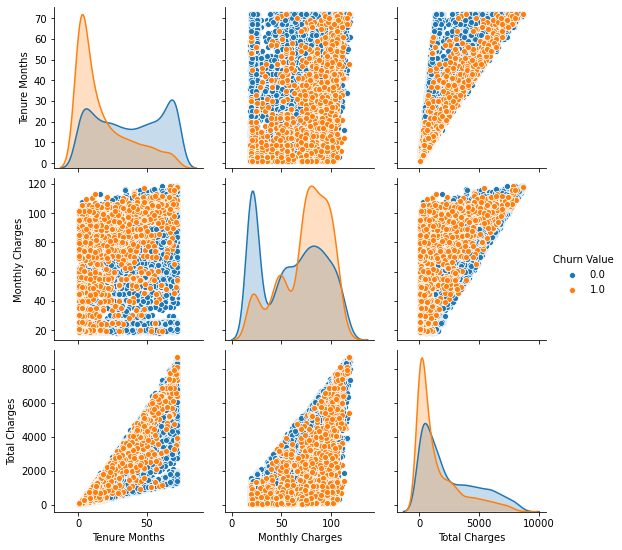

In [70]:
sns.pairplot(data_set.iloc[:,:4],hue="Churn Value")
plt.show()

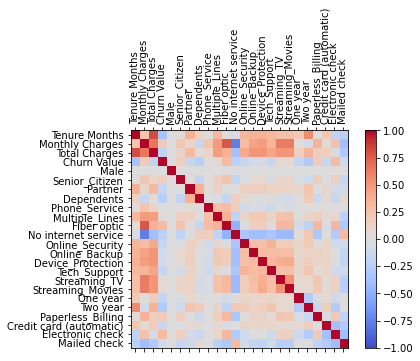

In [71]:
corr = data_set.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_set.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_set.columns)
ax.set_yticklabels(data_set.columns)
plt.show()

## III- Modélisation KNN
- Diviser les données en données d'apprentissage et données de test.
- Centrage-Réduction des données (Standardisation)
- Application du modèle KNN
- Evaluation du modèle

In [72]:
X =  data_set.drop(['Churn Value'], axis=1)
y = data_set['Churn Value']
#Diviser les données (70% Apprentissage et 30% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [73]:
data_set.shape

(7032, 24)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Erreur')

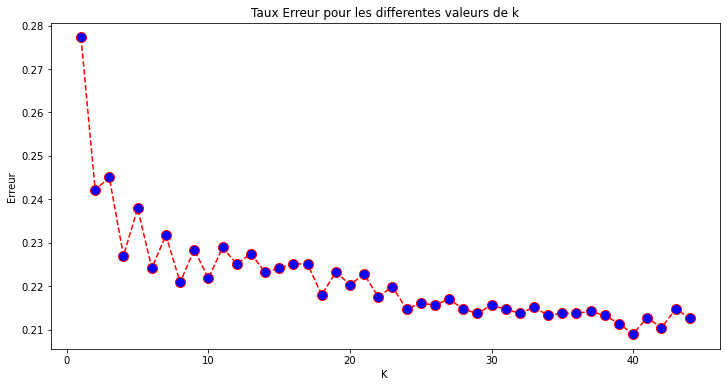

In [75]:
from sklearn.neighbors import KNeighborsClassifier

error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 45 et la distance Manhattan
for i in range(1, 45):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 45), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

#### Observation
* 0<K<40: Under fitting
* K=40  : Appropriate fitting
* 40<K  : Over fitting 


In [77]:
knn = KNeighborsClassifier(40,metric='manhattan')
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

## VI-Evaluation du Modéle

In [81]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.79


In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[1354  203]
 [ 238  315]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1557
         1.0       0.61      0.57      0.59       553

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.72      2110
weighted avg       0.79      0.79      0.79      2110

